# **IOT HEALTHCARE SECURITY**'
# **KELOMPOK 3**
---
Anggota kelompok:

-Hafiz Ardra Al kautsar (53114221048)

-Fauz Firdaus (5311422109)

-Abimanyu Rismandaru (5311422110)

-Jevanca Anandi Fawaz Al fauzy (5311422111)

-Zain Tenroaji Mahfudz Abubakar (5311422112)

# **Menyalin Ketiga Dataset**


---

Ketiga dataset tersebut ditempatkan dalam satu folder bernama ICUDatasetProcessed yang terdiri dari file csv Attack, Environment Monitoring, dan Patient Monitoring.



In [ ]:
!cp -r /content/ICUDatasetProcessed

cp: missing destination file operand after '/content/ICUDatasetProcessed'
Try 'cp --help' for more information.


# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split


# **Import file Environment Monitoring**


---

Mengimport file Environment Monitoring yang berada dalam folder ICU dataset Processed untuk mengetahui kolom apa saja yang ada di dalam dataframe.

In [ ]:
df1 = pd.read_csv('/content/ICUDatasetProcessed/environmentMonitoring.csv')
df1.columns

Index(['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src',
       'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.flags', 'tcp.time_delta',
       'tcp.len', 'tcp.ack', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.sack', 'tcp.connection.syn', 'tcp.flags.ack',
       'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn',
       'tcp.flags.urg', 'tcp.hdr_len', 'tcp.payload', 'tcp.pdu.size',
       'tcp.window_size_value', 'tcp.checksum', 'mqtt.clientid',
       'mqtt.clientid_len', 'mqtt.conack.flags', 'mqtt.conack.val',
       'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved',
       'mqtt.conflag.retain', 'mqtt.conflag.willflag', 'mqtt.conflags',
       'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg',
       'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.topic',
       'mqtt.topic_len', 'mqtt.ver', 'mqtt.willmsg_len', 'ip.proto', 'ip.ttl',
       'class', 'label'],
      dtype='object')

mengimpor modul `os` yang memungkinkan operasi sistem, kemudian menetapkan sebuah variabel `path` dengan nilai `ICUDatasetProcessed/`, dan mengambil daftar file dalam folder tersebut menggunakan fungsi `os.listdir(path)`. Variabel `csvs` kemudian akan berisi daftar file yang ada dalam direktori tersebut.



In [ ]:
import os
path = 'ICUDatasetProcessed/'
csvs = os.listdir(path)
csvs

['patientMonitoring.csv', 'environmentMonitoring.csv', 'Attack.csv']

Kode ini membaca serangkaian file CSV yang disimpan dalam variabel csvs, dan kemudian menggabungkan data dari setiap file ke dalam DataFrame tunggal yang disebut df1. kemudian stiap file dari dalam folder di cek untuk melihat jumlah baris dan kolomnya.


In [ ]:
import pandas as pd

df1 = pd.DataFrame()

for csv in csvs:
  print(f'---- Reading {csv} ----')
  df = pd.read_csv(path+csv)
  print(f'df.shape: {df.shape}')
  empty_cols = [col for col in df.columns if df[col].isnull().all()]
  print(f'empty_cols: {len(empty_cols)}')
  print(empty_cols)
  df.fillna(0, inplace=True)
  df1 = df1.append(df, ignore_index=True)
  print(f'df1.shape: {df1.shape}')


---- Reading patientMonitoring.csv ----


<ipython-input-37-9b0f20655e43>:7: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+csv)


df.shape: (76810, 52)
empty_cols: 0
[]


<ipython-input-37-9b0f20655e43>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df, ignore_index=True)


df1.shape: (76810, 52)
---- Reading environmentMonitoring.csv ----
df.shape: (31758, 52)
empty_cols: 0
[]
df1.shape: (108568, 52)
---- Reading Attack.csv ----


<ipython-input-37-9b0f20655e43>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df, ignore_index=True)
<ipython-input-37-9b0f20655e43>:7: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+csv)


df.shape: (80126, 52)
empty_cols: 0
[]
df1.shape: (188694, 52)


<ipython-input-37-9b0f20655e43>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df, ignore_index=True)


# **Pengelompokkan Fitur**
Mengelompokkan fitur dari dalam dataframe dengan nama 'feats'.

In [ ]:
feats = ['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport','mqtt.topic', 'mqtt.msg', 'tcp.payload','mqtt.clientid', 'mqtt.conflags', 'mqtt.conack.flags', 'class']


Menghapus beberapa fitur dari dataframe df1. Fitur yang dihapus dimuat dalam 'feats'. Kemudian sisa dari baris dan kolom yang ada dalam dataframe akan ditampilkan.

In [ ]:
df1.drop(labels=feats, axis=1, inplace=True)
df1.shape


(188694, 41)

Mengelompokkan fitur atau kolom yang berada di dalam dataframe menjadi dua jenis yaitu, fs1 dan fs2 untuk memudahkan dalam memproses ataupun menganalisis

In [ ]:
fs1 =  ['frame.time_delta', 'tcp.flags', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.hdr_len',
        'mqtt.clientid_len', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'ip.proto', 'ip.ttl', 'label']
fs2 = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver', 'label']


Dengan menggunakan df1[fs2], kolom-kolom yang ada dalam daftar fs2 dari DataFrame df1 dipilih. Kemudian, df1.shape digunakan untuk mencetak dimensi DataFrame df1 setelah pemilihan kolom dilakukan. Jadi, df1 sekarang berisi hanya kolom-kolom yang sesuai dengan daftar fs2, dan df1.shape mencetak jumlah baris dan kolom dalam DataFrame yang telah dipilih tersebut.

In [ ]:
df1 = df1[fs2]
df1.shape

(188694, 11)

 menghitung jumlah kemunculan setiap nilai yang terdapat dalam kolom 'label' dari DataFrame df1.

In [ ]:
df1['label'].value_counts()

0    108568
1     80126
Name: label, dtype: int64

# **Preprocessing**


---
Mengubah atau mengkonvert bilangan tipe lain menjadi bilangan numerik dari 'label encoder' dengan metode fit_transform.


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#df1['tcp.flags']= label_encoder.fit_transform(df1['tcp.flags'])
#df1['tcp.checksum']= label_encoder.fit_transform(df1['tcp.checksum'])
df1['mqtt.hdrflags']= label_encoder.fit_transform(df1['mqtt.hdrflags'])


Membagi dataset menjadi dua tipe yaitu, data train dan data set. Kolom yang tidak digunakan adalah kolom 'label'. Kemudian, hanya 30% dari dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( df1.drop(labels=['label'], axis=1), df1['label'],
                                                                            test_size=0.3, random_state=100)

Hasilnya adalah empat variabel:

1. X_train: akan digunakan untuk pelatihan model.
2. X_test: akan digunakan untuk menguji model.
3. y_train: Subset label yang sesuai dengan X_train, yang akan digunakan untuk melatih model.
4. y_test: Subset label yang sesuai dengan X_test, yang akan digunakan untuk mengevaluasi model.

# **Logistic Regression**


---

melakukan seleksi fitur berdasarkan model yang digunakan untuk klasifikasi. Pengklasifikasian ini menggunakan data train dan data test. Ini memungkinan Logistic Regression untuk melatih dirinya sendiri sekaligus melakukan seleksi fitur. Setelah proses seleksi selesai, daftar boolean akan muncul yang menunjukkan fitur mana yang telah dipilih. Jumlah fitur yang terpilih dan daftar fitur-fitur yang terpilih kemudian dicetak untuk memberikan pemahaman tentang fitur-fitur yang relevan yang telah dipilih untuk digunakan dalam model klasifikasi decision tree dan ANN.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

print('---------- SelectFromModel LogisticRegression -----------')
embeded_LR_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), threshold='0.9*median',
                                      max_features = 10)
embeded_LR_selector.fit(X_train, y_train)
embeded_LR_support = embeded_LR_selector.get_support()
print('embeded_LR_support',embeded_LR_support)
#embeded_lr_selector = embeded_lr_selector.scores_
#embeded_lr_support = embeded_lr_selector.get_support()
#embeded_LR_feature = df.loc[:,embeded_LR_support].columns.tolist()

embeded_LR_feature = X_train.loc[:,embeded_LR_support].columns.tolist()

print(len(embeded_LR_feature), 'selected features')
print('embeded_LR_features: ', embeded_LR_feature)

---------- SelectFromModel LogisticRegression -----------
embeded_LR_support [False  True  True  True False False False  True  True False]
5 selected features
embeded_LR_features:  ['tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'mqtt.qos', 'mqtt.retain']


Mengelompokkan fitur atau kolom yang berada di dalam dataframe menjadi dua jenis yaitu, fs1 dan fs2 untuk memudahkan dalam memproses ataupun menganalisis

In [ ]:
fs1 =  ['frame.time_delta', 'tcp.flags', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.hdr_len', 'mqtt.clientid_len', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'ip.proto', 'ip.ttl']
fs2 = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver']


# **Import Library untuk Metode**


---

Mengimport library untuk beberapa metode seperti GaussianNB, Adaboost, Decision tree, dan Artificiall Neural Network (ANN)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC   #SVM

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

# **METODE MACHINE LEARNING**


---
Kami menggunakan 4 metode antara lain:
1. GaussianNB
2. Adaboost
3. Decision Tree
4. Artificial Neural Network (ANN)

Kode di bawah menerapkan beberapa model klasifikasi pada data yang telah dipisahkan menjadi data train (X_train dan y_train) dan data set(X_test).

In [ ]:
print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)
gnb_prediction = gnb.predict(X_test)


print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)


print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)

from sklearn.neural_network import MLPClassifier

print('--------Applying Artificial Neural Network Classifier ----------')
ann_classifier = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(100,), random_state=1)
ann_classifier.fit(X_train, y_train)
ann_prediction = ann_classifier.predict(X_test)

--------Applying GaussianNB Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------
--------Applying DecisionTree Classifier ----------
--------Applying Artificial Neural Network Classifier ----------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# **Classification Performance**


---

Program ini untuk melakukan evaluasi kinerja beberapa model klasifikasi menggunakan berbagai metrik
seperti akurasi, presisi, recall, dan F1-score. Tujuan utama dari program ini adalah untuk membandingkan kinerja beberapa model klasifikasi yang telah dilatih pada data uji
yang telah dipersiapkan sebelumnya,  program juga mencetak hasil evaluasi performa model dalam bentuk dataframe.

In [ ]:
print('-------Classification Performance----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accurary','Precision', 'Recall','F1-Score'))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction)*100,
                recall_score(y_test,  gnb_prediction)*100,
                f1_score(y_test,  gnb_prediction)*100))
results.append(('AB ', accuracy_score(y_test,  AB_prediction)*100,
                precision_score(y_test,  AB_prediction)*100,
                recall_score(y_test,  AB_prediction)*100,
                f1_score(y_test,  AB_prediction)*100))
results.append(('DT ', accuracy_score(y_test,  DT_prediction)*100,
                precision_score(y_test,  DT_prediction)*100,
                recall_score(y_test,  DT_prediction)*100,
                f1_score(y_test,  DT_prediction)*100))
results.append(('ann ', accuracy_score(y_test,  DT_prediction)*100,
                precision_score(y_test,  DT_prediction)*100,
                recall_score(y_test,  DT_prediction)*100,
                f1_score(y_test,  DT_prediction)*100))

print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Classification Performance----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accurary', 'Precision', 'Recall', 'F1-Score'), ('NB ', 79.5120917168648, 99.76203696359165, 52.08945951542763, 68.44253373966043), ('AB ', 99.50007949266018, 99.50211600697038, 99.32491199006004, 99.41343503222998), ('DT ', 99.69086187708668, 99.81296758104739, 99.46158624974115, 99.63696711959341), ('ann ', 99.69086187708668, 99.81296758104739, 99.46158624974115, 99.63696711959341)]
type(df_results):  <class 'pandas.core.frame.DataFrame'>
df_results:              0          1          2          3          4
0          LR                                            
1  Classifier   Accurary  Precision     Recall   F1-Score
2         NB   79.512092  99.762037   52.08946  68.442534
3         AB   99.500079  99.502116  99.324912  99.413435
4         DT   99.690862  99.812968  99.461586  99.636967
5        ann   99.690862  99.812968  99.461586  99.636967


# **Confusion Matrix**


---
Tujuan dari program ini adalah untuk memberikan pemahaman yang lebih baik tentang seberapa baik model-model tersebut dalam melakukan klasifikasi pada data uji yang tidak terlihat sebelumnya. Confusion matrix adalah alat evaluasi yang berguna dalam mengevaluasi kinerja model klasifikasi dengan membandingkan hasil prediksi model dengan nilai sebenarnya dari target klasifikasi.



In [ ]:
print('Confusion Matrix gnb_prediction')
print(confusion_matrix(y_test,gnb_prediction))
print('Confusion Matrix AB_prediction')
print(confusion_matrix(y_test,AB_prediction))
print('Confusion Matrix DT_prediction')
print(confusion_matrix(y_test,DT_prediction))
print('Confusion Matrix ann_prediction')
print(confusion_matrix(y_test,ann_prediction))


Confusion Matrix gnb_prediction
[[32434    30]
 [11568 12577]]
Confusion Matrix AB_prediction
[[32344   120]
 [  163 23982]]
Confusion Matrix DT_prediction
[[32419    45]
 [  130 24015]]
Confusion Matrix ann_prediction
[[30046  2418]
 [  147 23998]]


# **Mengubah hasil Confussion Matrix dalam bentuk Label**

Program di bawah berfungsi untuk membuat visualisasi Confusion Matrix untuk beberapa model klasifikasi yang telah dilatih dalam bentuk Label. Tujuan dari program ini adalah untuk membantu mempermudah pemahaman performa model klasifikasi dengan cara memvisualisasikan seberapa baik model tersebut dalam memprediksi kelas yang benar.

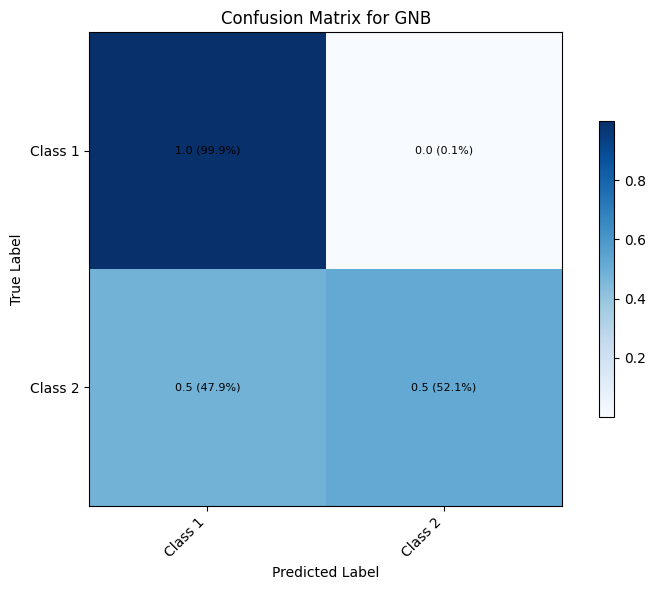

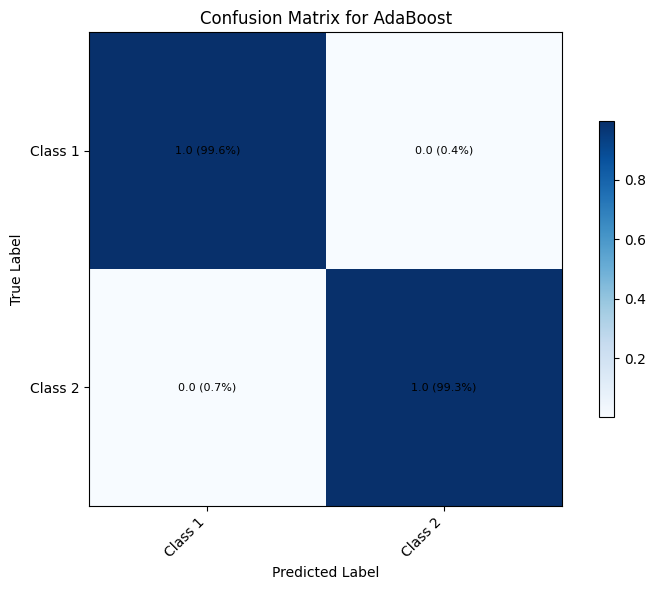

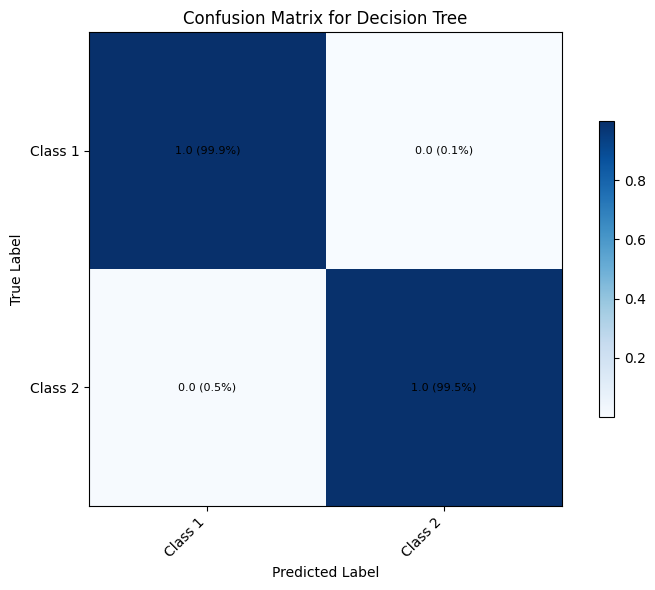

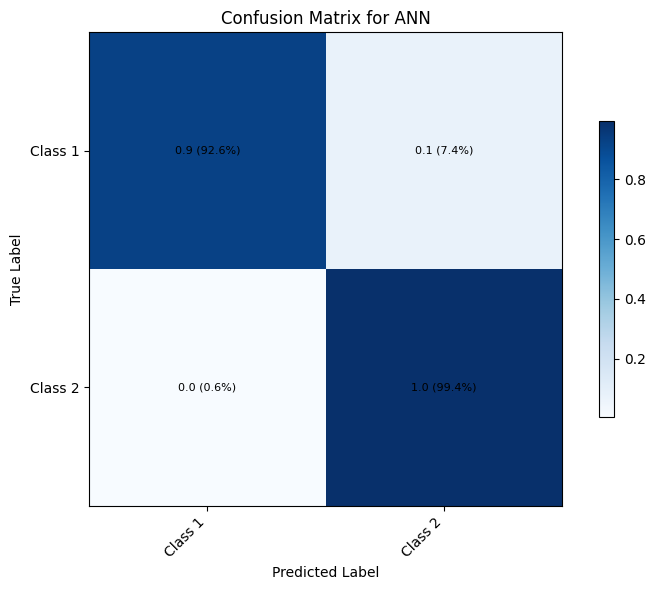

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class labels (assuming you have two classes)
class_labels = ["Class 1", "Class 2"]

# Function to plot a confusion matrix with additional formatting
def plot_confusion_matrix(cm, model_name, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    cmap = plt.cm.Blues

    # Normalize the confusion matrix for better visualization
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, fraction=0.02, pad=0.05)

    plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45, ha='right')
    plt.yticks(np.arange(len(class_labels)), class_labels)

    # Annotate entries with counts and percentages (rounded to one decimal)
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            text = f"{cm[i, j]:.1f} ({cm[i, j]*100:.1f}%)"
            plt.text(j, i, text, ha="center", va="center", fontsize=8)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Extract data from confusion matrices (assuming they are NumPy arrays)
gnb_cm = np.array([[32434, 30], [11568, 12577]])
knn_cm = np.array([[32375, 89], [114, 24031]])
rf_cm = np.array([[32412, 52], [119, 24026]])
ab_cm = np.array([[32344, 120], [163, 23982]])
logreg_cm = np.array([[29919, 2545], [127, 24018]])
dt_cm = np.array([[32419, 45], [130, 24015]])
ann_cm = np.array([[30046, 2418], [147, 23998]])
# Create and display confusion matrix plots for each model
plot_confusion_matrix(gnb_cm, "GNB")
plot_confusion_matrix(ab_cm, "AdaBoost")
plot_confusion_matrix(dt_cm, "Decision Tree")
plot_confusion_matrix(ann_cm, "ANN")

# **Menghitung dan Mencetak Loss Performance*

program dibawah untuk menghitung tingkat kerugian (Loss) untuk setiap model klasifikasi yang telah diprediksi sebelumnya, seperti Gaussian Naive Bayes (GNB), AdaBoost (AB), Decision Tree (DT), dan Artificial Neural Network (ANN).

Tujuan dari program ini adalah untuk memberikan informasi tentang seberapa efektif setiap model klasifikasi dalam melakukan prediksi.

In [ ]:
def calculate_loss(confusion_matrix):
  """
  Calculates the classification loss (misclassification rate)
  from a confusion matrix.

  Args:
      confusion_matrix (numpy.ndarray): A 2D array representing the confusion matrix.

  Returns:
      float: The classification loss (misclassification rate).
  """

  # Extract the total number of predictions
  total_predictions = np.sum(confusion_matrix)

  # Calculate the number of incorrect predictions
  incorrect_predictions = np.sum(confusion_matrix.flatten()[:-1])  # Exclude true negatives

  # Calculate the loss (misclassification rate)
  loss = incorrect_predictions / total_predictions

  return loss

# Calculate loss for each confusion matrix
gnb_loss = calculate_loss(gnb_prediction)
ab_loss = calculate_loss(AB_prediction)
dt_loss = calculate_loss(DT_prediction)
ann_loss = calculate_loss(ann_prediction)

# Print the results
print("Loss (Misclassification Rate):")
print(f"GNB: {gnb_loss:.4f}")
print(f"AdaBoost: {ab_loss:.4f}")
print(f"Decision Tree: {dt_loss:.4f}")
print(f"ANN: {ann_loss:.4f}")

Loss (Misclassification Rate):
GNB: 0.9999
AdaBoost: 1.0000
Decision Tree: 1.0000
ANN: 1.0000
